In [3]:
import mcba
mcba.__file__

'/home/br/sweethome/1Dimpur/mcba_sandbox/mcba/__init__.py'

In [2]:
!echo $PYTHONPATH

/home/br/sweethome/1Dimpur/mcba_sandbox/


In [4]:
%matplotlib notebook

import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt

import pandas as pd

# Run the walker / load the DB

In [17]:
from mcba.walker import Walker
from mcba.models.impurity import Par, SingleImpurity
from mcba.models.impurity import gamma, initial_q, k_F, E_FS, E_in, energy

par = Par(N=15, L=45, m_q=10)
model = SingleImpurity(par)

#run MC
walker = Walker(model, db_fname='N15.sqlite') 
walker.walk()


 *** checkpointing, do NOT terminate...done

***************** sweeps =  42 	( 16  steps each)
Par: N = 15,  L = 45,  V = 1.00,  gamma = 3.00
     m_q = 10,  q = 1.40,  k_F = 1.05,  a = 0.089
total cnf count =  109 rcache size =  0
\sum |<FS|fq>|^2 = 0.9732
\sum  <fq | P_up | fq> = 0.5563
self.fs_pairs =  fsPairs(h=[7], p=[10])
addr/acpt: 
	 create/annihilate_pair:  0.31 / 0.0
	 move_fs_hole:  0.58 / 0.27
	 move_fs_particle:  0.59 / 0.24
	 umklapp_hole:  0.73 / 0.28
	 umkl_scatter:  0.24 / 0.14
	 scatter_hp:  0.37 / 0.2
	 scatter_pp:  0.0 / 0.0
	 scatter_hh:  0.0 / 0.0



 *** checkpointing, do NOT terminate...done

***************** sweeps =  84 	( 16  steps each)
Par: N = 15,  L = 45,  V = 1.00,  gamma = 3.00
     m_q = 10,  q = 1.40,  k_F = 1.05,  a = 0.089
total cnf count =  128 rcache size =  0
\sum |<FS|fq>|^2 = 0.9776
\sum  <fq | P_up | fq> = 0.5561
self.fs_pairs =  fsPairs(h=[7], p=[11])
addr/acpt: 
	 create/annihilate_pair:  0.29 / 0.0
	 move_fs_hole:  0.58 / 0.26
	 move_fs_p


 *** checkpointing, do NOT terminate...done

***************** sweeps =  630 	( 16  steps each)
Par: N = 15,  L = 45,  V = 1.00,  gamma = 3.00
     m_q = 10,  q = 1.40,  k_F = 1.05,  a = 0.089
total cnf count =  3569 rcache size =  0
\sum |<FS|fq>|^2 = 0.995
\sum  <fq | P_up | fq> = 0.5628
self.fs_pairs =  fsPairs(h=[3, 7], p=[-10, 23])
addr/acpt: 
	 create/annihilate_pair:  0.26 / 0.0068
	 move_fs_hole:  0.51 / 0.19
	 move_fs_particle:  0.56 / 0.19
	 umklapp_hole:  0.51 / 0.16
	 umkl_scatter:  0.46 / 0.17
	 scatter_hp:  0.42 / 0.21
	 scatter_pp:  0.44 / 0.22
	 scatter_hh:  0.25 / 0.048



 *** checkpointing, do NOT terminate...done

FINALLY,
  total distinct confs:  3569
\sum |<FS|fq>|^2 =  0.9950000658562529
\sum  <fq | P_up | fq> =  0.5628000570786597
FINALIZE: done 



In [16]:
!rm N15.sqlite

In [62]:
from mcba.walker import Walker
from mcba.models.impurity import Par, SingleImpurity
from mcba.models.impurity import gamma, initial_q, k_F, E_FS, E_in, energy, E_F

par = Par(N=15, L=45, m_q=10)
model = SingleImpurity(par)

initial_q(par)

1.3962634015954636

In [8]:
import mcba.models.impurity.matrix_elements2 as mx2
import mcba.db as db

In [9]:
#it = filter(lambda x: len(x["partition"].h) == 1, db.row_iterator(handle))

db_fname = './N15.sqlite'
handle, = db.get_handles(db_fname)
par = db.get_param(handle)

lst = list(dict(_) for _ in db.row_iterator(handle))
for x in lst:
    x['energy'] = energy(x, par)

lst_1 = [mx2._preprocess_roots(x, par) for x in lst] 

In [10]:
df = pd.DataFrame(lst_1)

In [11]:
df["FSfq**2"] = df["FSfq"]**2
df = df.sort_values("FSfq**2", ascending=False)

In [12]:
# check that c=+\infty is not present (double-counting w/-inf)
(df["c"] == float('inf')).sum()

0

In [13]:
E_in(par)

8.099331709462355

<IPython.core.display.Javascript object>


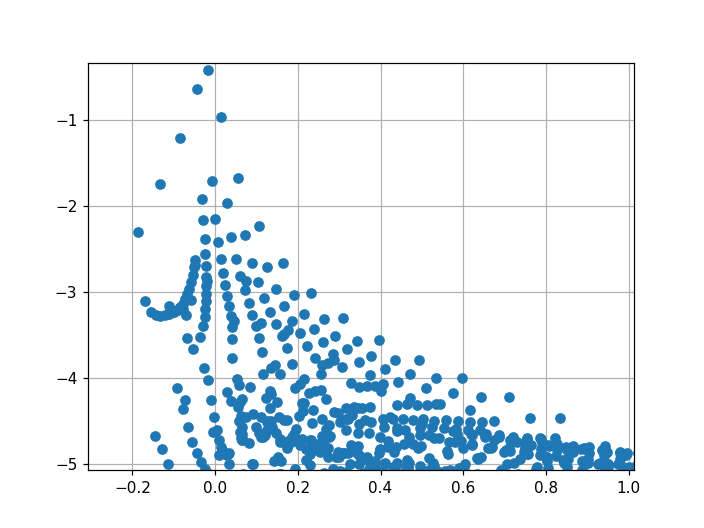

In [14]:
plt.plot((df["energy"] - E_in(par))/E_in(par), np.log10(df["FSfq**2"]), 'o')
plt.grid(True)

In [15]:
df.iloc[0, :].to_dict()

{'FSfq': -0.6199193158144347,
 'FSfq**2': 0.38429995811983686,
 'P': 0.8136677871384551,
 'Yfq': 0.31410754017720727,
 'buckets': array([-8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6, 11]),
 'c': 3.3668687247812823,
 'db_key': 0,
 'deltas': array([2.9564064 , 2.94646828, 2.93542311, 2.92307903, 2.90919823,
        2.89348282, 2.87555522, 2.85493086, 2.83097925, 2.80286835,
        2.76948353, 2.72930928, 2.68025689, 2.61941965, 2.54274946,
        1.71268679]),
 'energy': 7.967111842440881,
 'partition': fsPairs(h=[7], p=[11]),
 'roots': array([-22.17633483, -19.0446803 , -15.91413281, -12.78488424,
         -9.65717238,  -6.53129514,  -3.40763008,  -0.2866618 ,
          2.83097925,   5.94446101,   9.05266884,  12.15408724,
         15.24662751,  18.32738292,  21.39230538,  36.27020598])}

# Filter only states w/ a single hole

In [16]:
mask = [len(x.h) == 1 for x in df["partition"].values]

In [17]:
df_1 = df[mask]

In [20]:
df_1.size

1562

In [33]:
mask_0 = [len(x.h) < 1 for x in df["partition"].values]
df[mask_0]

,FSfq,P,Yfq,buckets,c,db_key,deltas,energy,partition,roots,FSfq**2


In [23]:
len(df_1["partition"])

142

<IPython.core.display.Javascript object>


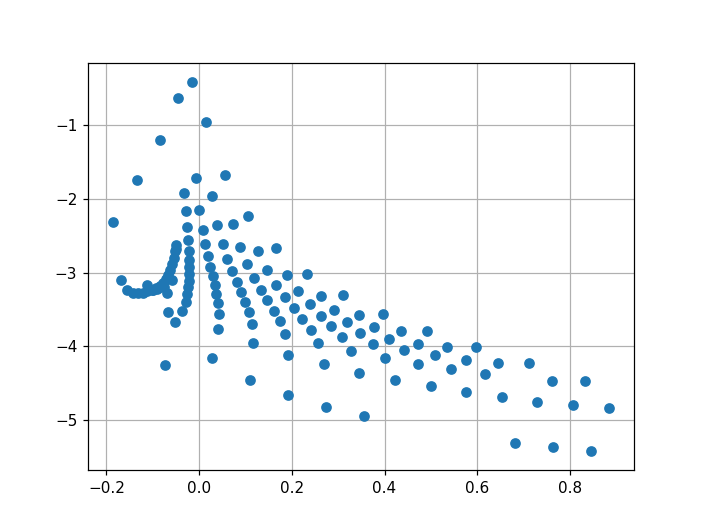

In [134]:
plt.plot((df_1["energy"] - E_in(par))/E_in(par), np.log10(df_1["FSfq**2"]), 'o')
plt.grid(True)

In [25]:
num_states = len(df_1)

pmat = np.empty((num_states, num_states), dtype=float)
for i in range(num_states):
    print("%s/%s " %(i, num_states), end=" ")
    ri = df_1.iloc[i, :].to_dict()
    for j in range(num_states):
        rj = df_1.iloc[j, :].to_dict()
        pmat[i, j] = mx2.fPf(ri, rj, par)

0/142  1/142  2/142  3/142  4/142  5/142  6/142  7/142  8/142  9/142  10/142  11/142  12/142  13/142  14/142  15/142  16/142  17/142  18/142  19/142  20/142  21/142  22/142  23/142  24/142  25/142  26/142  27/142  28/142  29/142  30/142  31/142  32/142  33/142  34/142  35/142  36/142  37/142  38/142  39/142  40/142  41/142  42/142  43/142  44/142  45/142  46/142  47/142  48/142  49/142  50/142  51/142  52/142  53/142  54/142  55/142  56/142  57/142  58/142  59/142  60/142  61/142  62/142  63/142  64/142  65/142  66/142  67/142  68/142  69/142  70/142  71/142  72/142  73/142  74/142  75/142  76/142  77/142  78/142  79/142  80/142  81/142  82/142  83/142  84/142  85/142  86/142  87/142  88/142  89/142  90/142  91/142  92/142  93/142  94/142  95/142  96/142  97/142  98/142  99/142  100/142  101/142  102/142  103/142  104/142  105/142  106/142  107/142  108/142  109/142  110/142  111/142  112/142  113/142  114/142  115/142  116/142  117/142  118/142  119/142  120/142  121/142  122/142  123

In [59]:
p2mat = pmat @ pmat

In [112]:
from scipy.linalg import eigvals
from numpy.linalg import cond

In [145]:
p2mat = pmat @ pmat


# m / M
mrs = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5])


spectra = []
for mr in mrs:
    h0 = np.diag(df_1["energy"] - E_in(par, mr))     # subtract m/M-dependent E_in
    factor = mr - 1. 
    h1 = h0 + factor*p2mat
    e1 = eigvals(h1)
    e1 = e1.real
    e1.sort()
    e1 = e1 / E_in(par)
    spectra.append(e1)
    print("m/M = %s" % mr, " cond # = ", cond(h1))

m/M = 0.5  cond # =  3699.121209633138
m/M = 0.6  cond # =  2260.976917805437
m/M = 0.7  cond # =  2169.459436695232
m/M = 0.8  cond # =  818.7253176782821
m/M = 0.9  cond # =  337.72578337075913
m/M = 1.0  cond # =  1423.8249692382178
m/M = 1.1  cond # =  1010.5503493513175
m/M = 1.2  cond # =  3249.5293249329993
m/M = 1.3  cond # =  270.9961610409625
m/M = 1.4  cond # =  2673.3640870793843
m/M = 1.5  cond # =  403.85172224938066


In [73]:
h0.shape

(142, 142)

<IPython.core.display.Javascript object>


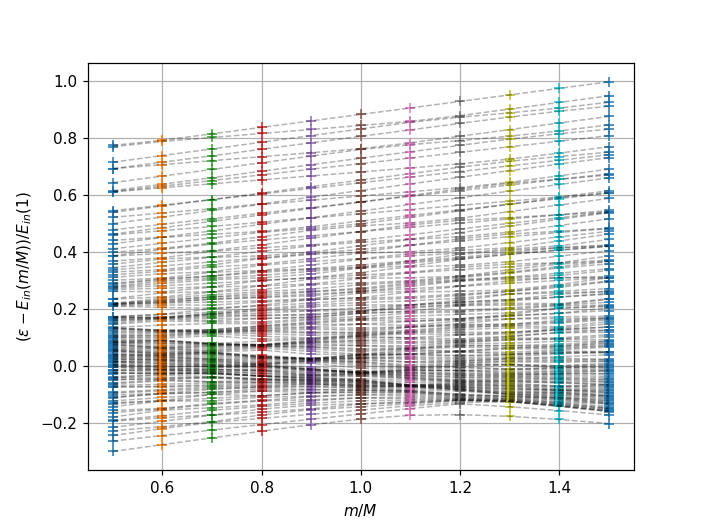

In [146]:
num = h0.shape[0]

for mr, spectrum in zip(mrs, spectra):
    plt.plot([mr]*num, spectrum[:num], '+', ms=7)
    
    
for state in range(num):
    pts = [s[state] for s in spectra]
    plt.plot(mrs, pts, '--', color='k', lw=1, alpha=0.3)


plt.xlabel(r'$m/M$')
plt.ylabel(r'$(\epsilon - E_{in}(m/M)) / E_{in}(1)$')

plt.grid(True)

In [148]:
from math import fsum
fsum(df_1["FSfq**2"])

0.9782293421606677

# Filter only large overlap states

In [149]:
mask = df["FSfq**2"] > 1e-5
df_2 = df[mask]

In [150]:
len(df_2)

438

<IPython.core.display.Javascript object>


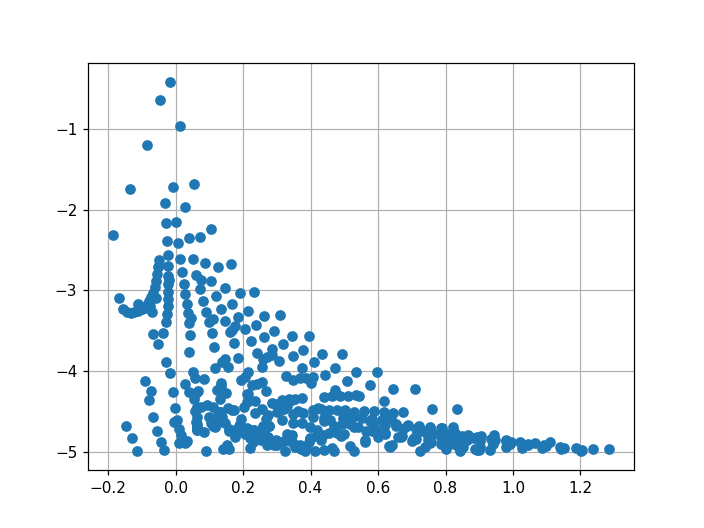

In [151]:
plt.plot((df_2["energy"] - E_in(par))/E_in(par), np.log10(df_2["FSfq**2"]), 'o')
plt.grid(True)

In [152]:
num_states = len(df_2)

pmat_2 = np.empty((num_states, num_states), dtype=float)
for i in range(num_states):
    print("%s/%s " %(i, num_states), end=" ")
    ri = df_2.iloc[i, :].to_dict()
    for j in range(num_states):
        rj = df_2.iloc[j, :].to_dict()
        pmat_2[i, j] = mx2.fPf(ri, rj, par)

0/438  1/438  2/438  3/438  4/438  5/438  6/438  7/438  8/438  9/438  10/438  11/438  12/438  13/438  14/438  15/438  16/438  17/438  18/438  19/438  20/438  21/438  22/438  23/438  24/438  25/438  26/438  27/438  28/438  29/438  30/438  31/438  32/438  33/438  34/438  35/438  36/438  37/438  38/438  39/438  40/438  41/438  42/438  43/438  44/438  45/438  46/438  47/438  48/438  49/438  50/438  51/438  52/438  53/438  54/438  55/438  56/438  57/438  58/438  59/438  60/438  61/438  62/438  63/438  64/438  65/438  66/438  67/438  68/438  69/438  70/438  71/438  72/438  73/438  74/438  75/438  76/438  77/438  78/438  79/438  80/438  81/438  82/438  83/438  84/438  85/438  86/438  87/438  88/438  89/438  90/438  91/438  92/438  93/438  94/438  95/438  96/438  97/438  98/438  99/438  100/438  101/438  102/438  103/438  104/438  105/438  106/438  107/438  108/438  109/438  110/438  111/438  112/438  113/438  114/438  115/438  116/438  117/438  118/438  119/438  120/438  121/438  122/438  123

In [153]:
p2mat = pmat_2 @ pmat_2

# m / M
mrs = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5])


spectra_2 = []
for mr in mrs:
    h0 = np.diag(df_2["energy"] - E_in(par, mr))     # subtract m/M-dependent E_in
    factor = mr - 1. 
    h1 = h0 + factor*p2mat
    e1 = eigvals(h1)
    e1 = e1.real
    e1.sort()
    e1 = e1 / E_in(par)
    spectra_2.append(e1)
    print("m/M = %s" % mr, " cond # = ", cond(h1))

m/M = 0.5  cond # =  1196.3430776501912
m/M = 0.6  cond # =  3742.6245196622435
m/M = 0.7  cond # =  2267.7530066066993
m/M = 0.8  cond # =  1977.8016787130232
m/M = 0.9  cond # =  804.3209778973944
m/M = 1.0  cond # =  2068.813230451826
m/M = 1.1  cond # =  1457.4220386129416
m/M = 1.2  cond # =  4770.885620828772
m/M = 1.3  cond # =  853.9723768012029
m/M = 1.4  cond # =  4737.920636284844
m/M = 1.5  cond # =  616.6285168740022


<IPython.core.display.Javascript object>


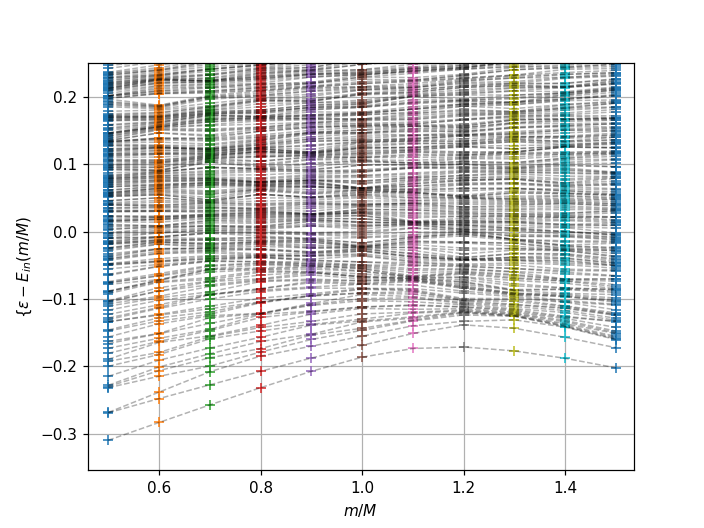

In [158]:
num = h0.shape[0]

for mr, spectrum in zip(mrs, spectra_2):
    plt.plot([mr]*num, spectrum[:num], '+', ms=7)
    
    
for state in range(num):
    pts = [s[state] for s in spectra_2]
    plt.plot(mrs, pts, '--', color='k', lw=1, alpha=0.3)


plt.xlabel(r'$m/M$')
plt.ylabel(r'$(\epsilon - E_{in}(m/M)} / { E_{in}(1)}$')

plt.grid(True)

In [155]:
from math import fsum
fsum(df_2["FSfq**2"])

0.9904145943622575

# DOS

<IPython.core.display.Javascript object>


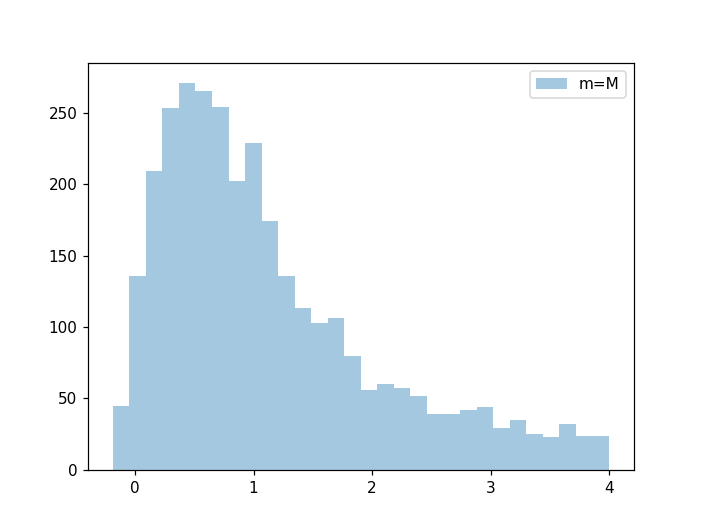

In [174]:
b = (df["energy"] - E_in(par)) / E_in(par)
b = b[b < 4]
plt.hist(b, bins=30, histtype='stepfilled', alpha=0.4, label='m=M')

plt.legend()

<IPython.core.display.Javascript object>


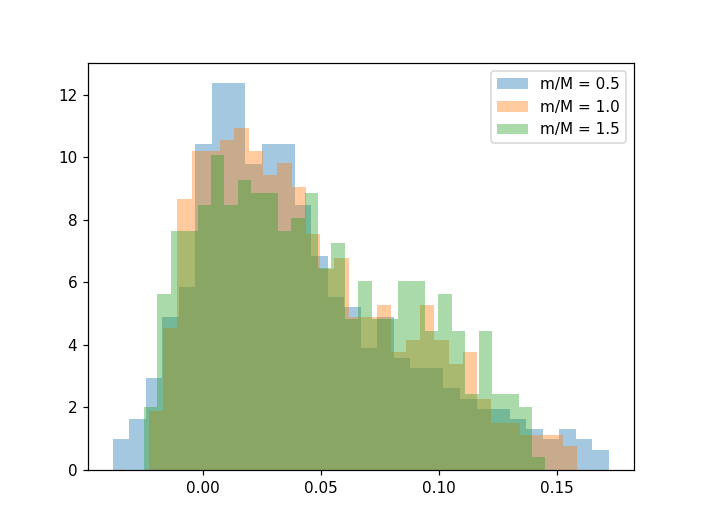

In [177]:
for idx in [0, 5, -1]:
    b = spectra_2[idx] / E_in(par)
    b = b[b < 4]
    plt.hist(b, bins=30, histtype='stepfilled', alpha=0.4, normed=True, label='m/M = %s' % mrs[idx])

plt.legend()

# Full matrix

In [178]:
m = np.load("fPf_N15.npz")
pmat_f = m["arr_0"]

In [180]:
p2mat = pmat_f @ pmat_f

# m / M
mrs = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5])


spectra_f = []
for mr in mrs:
    h0 = np.diag(df["energy"] - E_in(par, mr))     # subtract m/M-dependent E_in
    factor = mr - 1. 
    h1 = h0 + factor*p2mat
    e1 = eigvals(h1)
    e1 = e1.real
    e1.sort()
    e1 = e1 / E_in(par)
    spectra_f.append(e1)
    print("m/M = %s" % mr, " cond # = ", cond(h1))

m/M = 0.5  cond # =  651603.3252328379
m/M = 0.6  cond # =  53792.440922503905
m/M = 0.7  cond # =  22479.28218152345
m/M = 0.8  cond # =  23907.054484500943
m/M = 0.9  cond # =  10586.527666620907
m/M = 1.0  cond # =  53198.83470031869
m/M = 1.1  cond # =  25233.56304102357
m/M = 1.2  cond # =  85922.52039397614
m/M = 1.3  cond # =  77509.83959493082
m/M = 1.4  cond # =  76218.65623968287
m/M = 1.5  cond # =  200680.0993438927


<IPython.core.display.Javascript object>


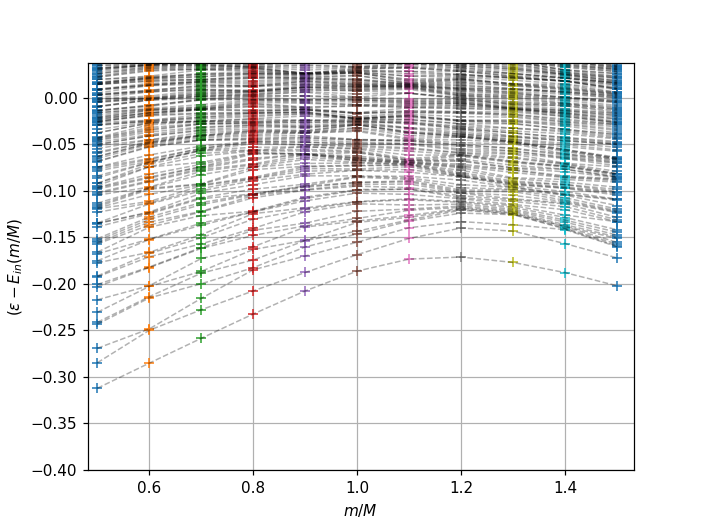

In [182]:
num = h0.shape[0]

for mr, spectrum in zip(mrs, spectra_f):
    plt.plot([mr]*num, spectrum[:num], '+', ms=7)
    
    
for state in range(num):
    pts = [s[state] for s in spectra_f]
    plt.plot(mrs, pts, '--', color='k', lw=1, alpha=0.3)


plt.xlabel(r'$m/M$')
plt.ylabel(r'$(\epsilon - E_{in}(m/M)} / { E_{in}(1)}$')

plt.grid(True)

In [188]:
for m_q in range(1, 13):
    print(m_q, initial_q(Par(N=15, L=45, m_q=m_q))/k_F(par))

1 0.13333333333333336
2 0.2666666666666667
3 0.4
4 0.5333333333333334
5 0.6666666666666667
6 0.8
7 0.9333333333333335
8 1.0666666666666669
9 1.2000000000000002
10 1.3333333333333335
11 1.4666666666666668
12 1.6
